**Executive summary**

On-time delivery is 91.89% nationally, while the avg delay time is 8.86 days. Delivery performance varies sharply by region. A 21-point gap separates top-performing Rondônia (97.12%) from bottom-performing Alagoas (76.07%). There is no apparent correlation between operational scale (customer numbers) and delivery performance. However, there seems to be regional geographic differences: the top-performing states are in the North Brazilian macroregion while the worst performing states are in the Northeastern region. Kruskal-Wallis confirms that regional differences are significant (p = 0.025). Finally, even inside the North region, the best performing states the neighbor bad performing states, which warrants a more in-depth analysis with more data. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

We start by showing overall delivery performance rate.

In [10]:
# Define the relative path to the directory containing derived datasets
# Using a variable makes it easier to change paths consistently across the notebook
path = './../data/derived/'

# Load monthly revenue data from CSV into a pandas DataFrame
df1 = pd.read_csv(path + 'delivery_performance.csv')
print(df1)

   timely_shipments  late_shipments  total_shipments  delivery_performance
0             88644            7826            96470                0.9189


Around 92% of all orders arrive at a timely manner, which is an impressive feat at first glance. Now we analyze the average delay time of order that do get delayed.

In [11]:
df2 = pd.read_csv(path + 'avg_delay_days.csv')
print(df2)

   avg_delay_days
0          8.8669


Although approximately 92% or orders are timely delivered, delayed orders arrive, on average, almost 9 days later than they were scheduled to. We deepen the analysis by examining delivery performance on a state by state basis

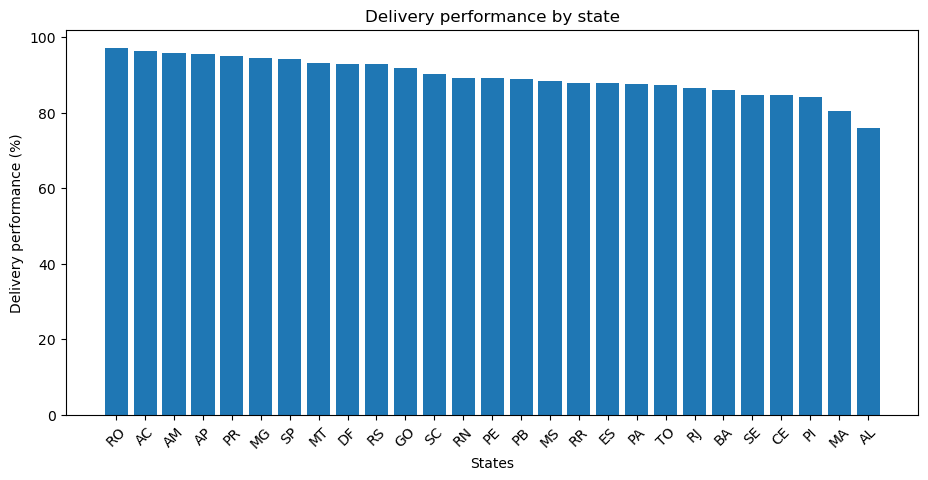

In [ ]:
df3 = pd.read_csv(path + 'delivery_performance_by_state.csv')

#State names
df_state = pd.read_csv('./../data/raw/brazil_states.csv') 

#Joins both dataframes
df3 = pd.merge(df_state, df3, on='state') 

#Sorts states by descending delivery performance
df3 = df3.sort_values(['on_time_rate'], ascending=False) 

fig, ax = plt.subplots(figsize=(11, 5))
ax.bar(df3['state'], df3['on_time_rate']*100)
plt.title('Delivery performance by state')
plt.xlabel('States')
plt.xticks(rotation=45)
plt.ylabel('Delivery performance (%)')
plt.show()

In [5]:
print("States with the highest delivery performance:\n", df3.head(5))
print("\nStates with the lowest delivery performance:\n", df3.tail(5))

States with the highest delivery performance:
    state state_name  on_time_rate
20    RO   Rondônia        0.9712
0     AC       Acre        0.9625
2     AM   Amazonas        0.9586
3     AP      Amapá        0.9552
17    PR     Paraná        0.9500

States with the lowest delivery performance:
    state state_name  on_time_rate
24    SE    Sergipe        0.8478
5     CE      Ceará        0.8468
16    PI      Piauí        0.8403
9     MA   Maranhão        0.8033
1     AL    Alagoas        0.7607


Delivery performance varies considerably across states, ranging from >95% in the best-performing states to approximately 76% in the worst (Alagoas). This variance could be related to regional infrastructure or operational scale. To assess the latter hypothesis we introduce customer number by state into the analysis and evaluate correlation between customer numbers and delivery performance.

In [6]:
df4 = pd.read_csv(path + 'customers_by_state.csv')
df4 = pd.merge(df3, df4, on='state')
df4[['customers', 'on_time_rate']].corr()

,customers,on_time_rate
customers,1.000000,0.211765
on_time_rate,0.211765,1.000000


A correlation of approximately 0.21 between customer volume and on-time rate indicates that operational scale does not explain performance differences. While we lack granular infrastructure data (road density, carrier coverage), we can introduce Brazil's official macroregions, defined by the Brazilian Institute of Geography and Statistics (IBGE)[1], as a proxy to group states with similar geographic and economic conditions.

[1] https://en.wikipedia.org/wiki/Regions_of_Brazil

In [7]:
df5 = pd.read_csv('./../data/raw/brazil_regions.csv')
df5 = pd.merge(df3, df5, left_on='state', right_on='state_acronym')

print("States with the highest delivery performance:\n", df5.head(5))
print("\nStates with the lowest delivery performance:\n", df5.tail(5))

States with the highest delivery performance:
   state state_name  on_time_rate state_acronym region_name
0    RO   Rondônia        0.9712            RO       North
1    AC       Acre        0.9625            AC       North
2    AM   Amazonas        0.9586            AM       North
3    AP      Amapá        0.9552            AP       North
4    PR     Paraná        0.9500            PR       South

States with the lowest delivery performance:
    state state_name  on_time_rate state_acronym region_name
22    SE    Sergipe        0.8478            SE   Northeast
23    CE      Ceará        0.8468            CE   Northeast
24    PI      Piauí        0.8403            PI   Northeast
25    MA   Maranhão        0.8033            MA   Northeast
26    AL    Alagoas        0.7607            AL   Northeast


At first glance, the data seems to indicate a relationship between both macroregions and performance delivery, as the four highest performing states are located in the North while the five worst performing states are from the Northeastern region. Next we aggregated performance rate by macroregion.

In [8]:
df6 = pd.read_csv(path + 'delivery_performance_by_macroregion.csv')
df6 = df6.sort_values(['on_time_rate'], ascending=False)

print(df6)

         region  on_time_rate
0         South        0.9295
1     Southeast        0.9255
2  Central-West        0.9203
3         North        0.9020
4     Northeast        0.8567


These results make the relationship less clear. The North ranks as the second lowest region despite including the top four highest performing states. This indicates that the North region includes low performing states neighboring the top performing ones. This warrants a more in-depth analysis, however, we do not have the data to do so and must leave this issue for the time being. Moving on, the results indicate that the Northeast is the bottom performing region. Given the non-conclusive results, we apply the Kruskal-Wallis test to assess whether delivery performance differs accros Brazilian macroregions. The dependent variable is the on-time delivery rate per state. States are grouped into the five macroregions (North, Northeast, Central-West, Southeast, South). The Kruskal-Wallis test is appropriate because it compares distributions across multiple groups without assuming normality, and the unit of analysis is at the state level (n=27), avoiding pseudoreplication.

In [9]:
# Extract delivery performance by macroregion
north = df5[df5['region_name'] == 'North']['on_time_rate'].tolist()
south = df5[df5['region_name'] == 'South']['on_time_rate'].tolist()
southeast = df5[df5['region_name'] == 'Southeast']['on_time_rate'].tolist()
northeast = df5[df5['region_name'] == 'Northeast']['on_time_rate'].tolist()
central_west = df5[df5['region_name'] == 'Central-West']['on_time_rate'].tolist()

# Run Kruskal-Wallis test
from scipy.stats import kruskal
stat, p_value = kruskal(north, south, southeast, northeast, central_west)

print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Kruskal-Wallis H-statistic: 11.1474
P-value: 0.0250


A Kruskal-Wallis test with 4 degrees of freedom found significant differences in on-time delivery rates across Brazilian macroregions (H = 11.15, p = 0.025), indicating that delivery performance is not evenly distributed across regions. This confirms that the observed pattern, where Southern and Southeastern states overall outperform Northeastern states, reflecting a systematic geographic disparity rather than random variation.